# Analyse Exploratoire du fichier myreport_sql_lock_full.csv

### Imports (fichier & modules)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [98]:
tab = pd.read_csv('../data/logServer/myreport_sql_lock_full.csv', sep=',', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

### Le fichier myreport_sql_lock_full.csv

In [100]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  12  colonnes dans le data frame


In [101]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)',
       'Nombre de requêtes de verrouillage/s',
       'Nombre de requêtes de verrouillage/s(RAW)', 'Temps d'attente moyen',
       'Temps d'attente moyen(RAW)', 'Nombre de blocages/s',
       'Nombre de blocages/s(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [102]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date et heure                              2882 non-null   object 
 1   Date et heure(RAW)                         2881 non-null   float64
 2   Nombre de requêtes de verrouillage/s       2195 non-null   object 
 3   Nombre de requêtes de verrouillage/s(RAW)  2194 non-null   float64
 4   Temps d'attente moyen                      2195 non-null   object 
 5   Temps d'attente moyen(RAW)                 2194 non-null   float64
 6   Nombre de blocages/s                       2192 non-null   object 
 7   Nombre de blocages/s(RAW)                  2194 non-null   float64
 8   Temps mort                                 2195 non-null   object 
 9   Temps mort(RAW)                            2194 non-null   float64
 10  Couverture              

In [103]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                                2882
Date et heure(RAW)                           2881
Nombre de requêtes de verrouillage/s         1122
Nombre de requêtes de verrouillage/s(RAW)    2194
Temps d'attente moyen                         305
Temps d'attente moyen(RAW)                    471
Nombre de blocages/s                            1
Nombre de blocages/s(RAW)                       2
Temps mort                                      1
Temps mort(RAW)                                 1
Couverture                                      3
Couverture(RAW)                                 2
dtype: int64


In [105]:
tab.head()


,Date et heure,Date et heure(RAW),Nombre de requêtes de verrouillage/s,Nombre de requêtes de verrouillage/s(RAW),Temps d'attente moyen,Temps d'attente moyen(RAW),Nombre de blocages/s,Nombre de blocages/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,708 #,708.1192,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,56 #,56.1687,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,142 #,142.3510,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0


### Transformation des dates

In [61]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['Date et heure'] = tab["Date et heure"].str.split(" - ").str[0]

tab=tab.iloc[:-5]
# Si vous avez un format comme "JJ/MM/AAAA HH:MM:SS", vous pouvez préciser :
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")

In [62]:
tab.head()


,Date et heure,Date et heure(RAW),Nombre de requêtes de verrouillage/s,Nombre de requêtes de verrouillage/s(RAW),Temps d'attente moyen,Temps d'attente moyen(RAW),Nombre de blocages/s,Nombre de blocages/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,2024-08-13 00:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,2024-08-13 01:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,2024-08-13 02:00:00,45517.041667,708 #,708.1192,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
3,2024-08-13 03:00:00,45517.083333,56 #,56.1687,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
4,2024-08-13 04:00:00,45517.125000,142 #,142.3510,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0


In [63]:
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [64]:
tab.shape

(1248, 12)

### Réagencement et Suppression des colonnes

In [66]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Nombre de requêtes de verrouillage/s"])
tab = tab.drop(columns=["Temps d'attente moyen"])
tab = tab.drop(columns=["Nombre de blocages/s"])
tab = tab.drop(columns=["Temps mort"])
#tab = tab.drop(columns=["Temps mort(RAW)"])
tab = tab.drop(columns=["Couverture"])
#tab = tab.drop(columns=["Couverture(RAW)"])


# renommage des colonnes
tab.rename(columns={"": ""}, inplace=True)
tab.rename(columns={"Nombre de requêtes de verrouillage/s(RAW)": "requete_verrouillage (sql lock)(nb/s)"}, inplace=True)
tab.rename(columns={"Temps d'attente moyen(RAW)": "temps_attente (sql lock)(ms)"}, inplace=True)
tab.rename(columns={"Nombre de blocages/s(RAW)": "nbr_blocage (sql lock)(nb/s)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort (sql lock)(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture (sql lock)(%)"}, inplace=True)

In [67]:
print(type(tab["Date et heure"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Analyse temporelle

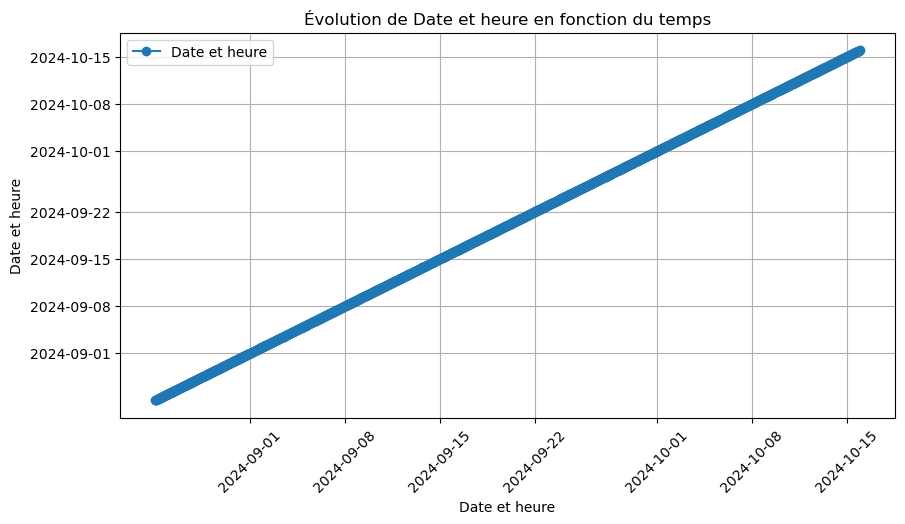

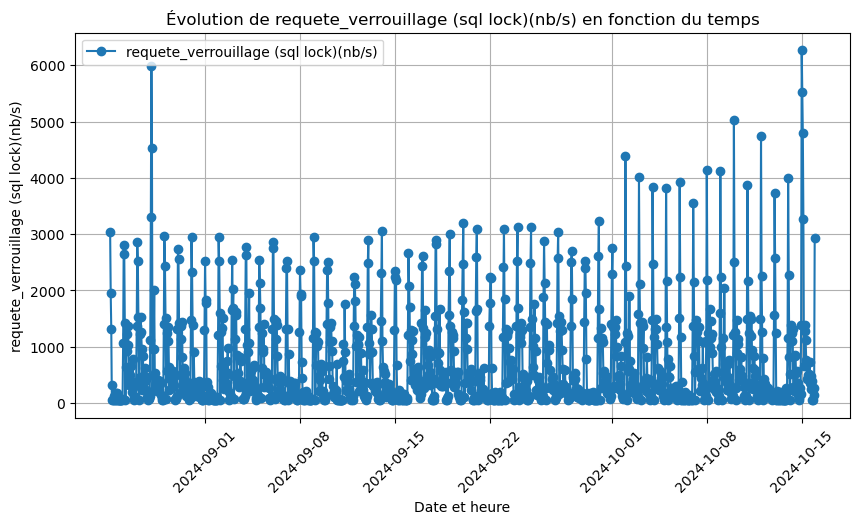

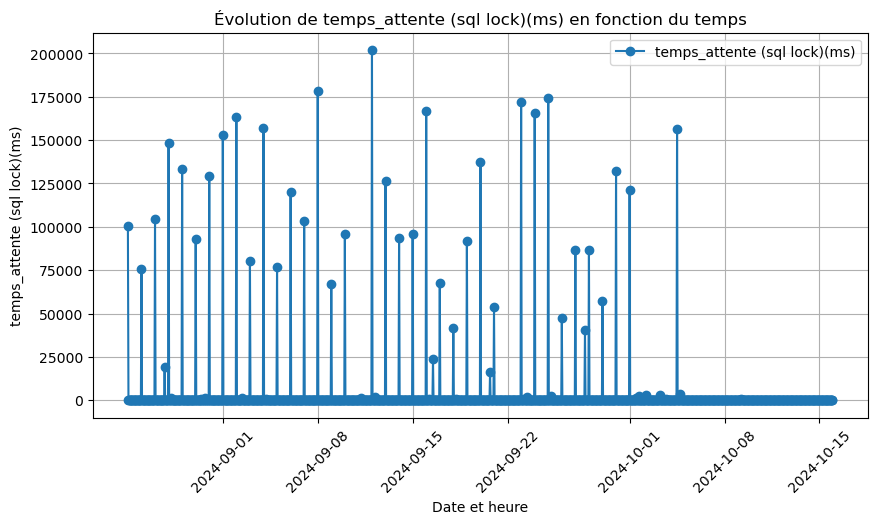

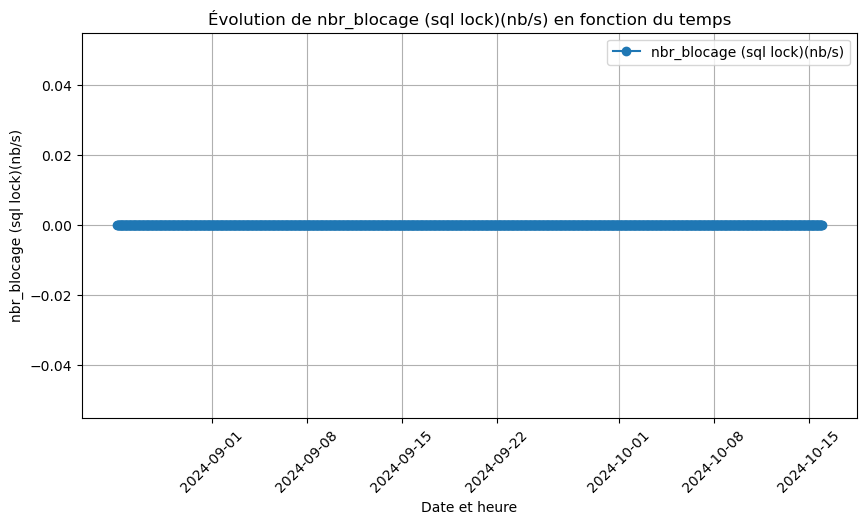

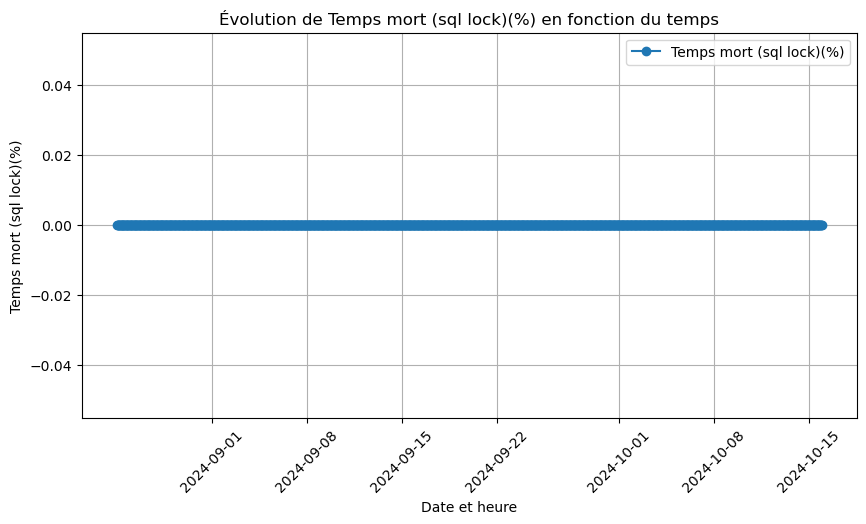

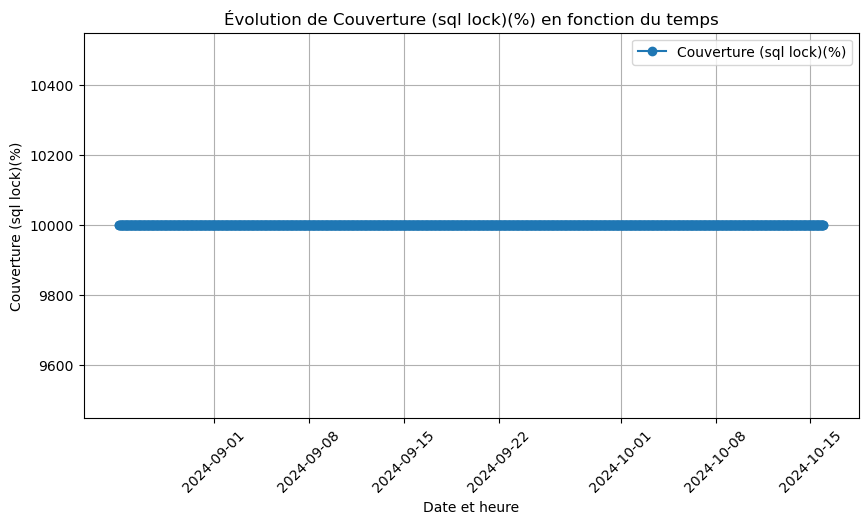

In [69]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

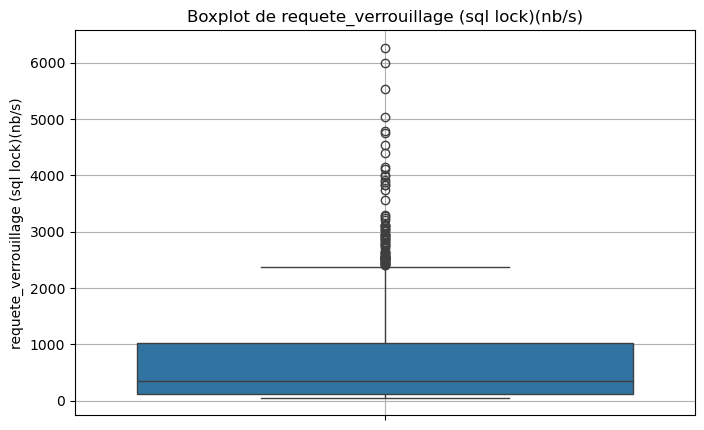

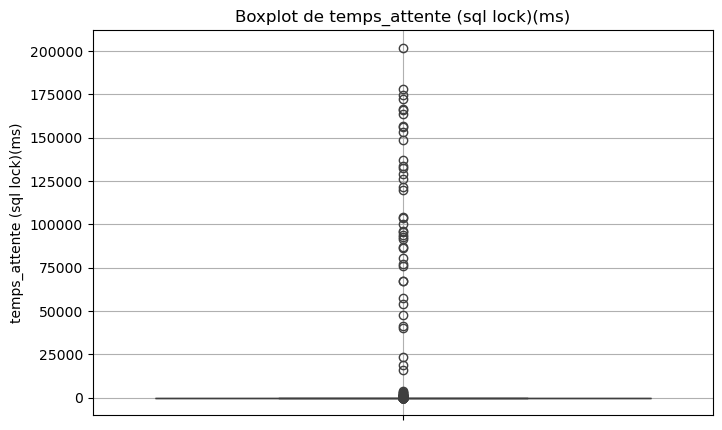

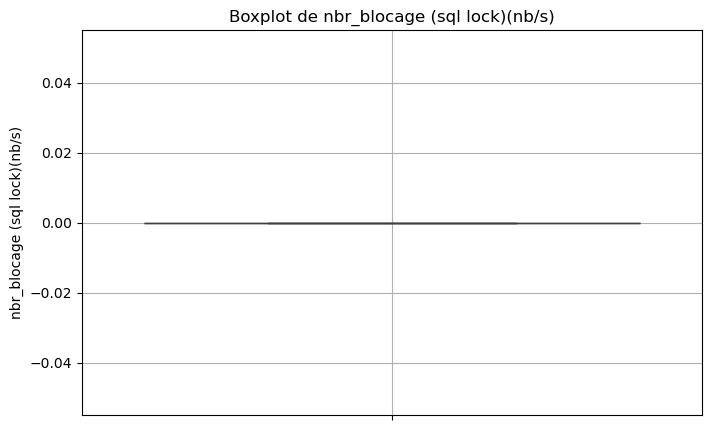

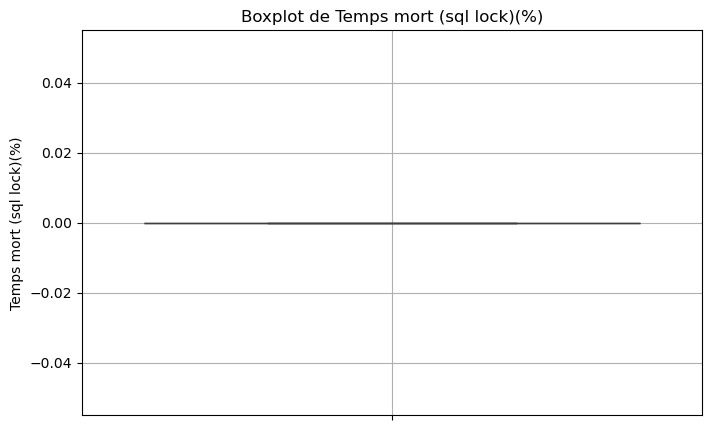

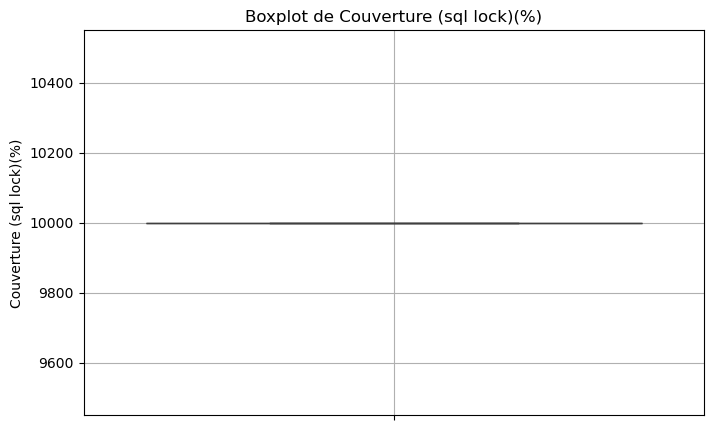

In [70]:
import seaborn as sns

# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

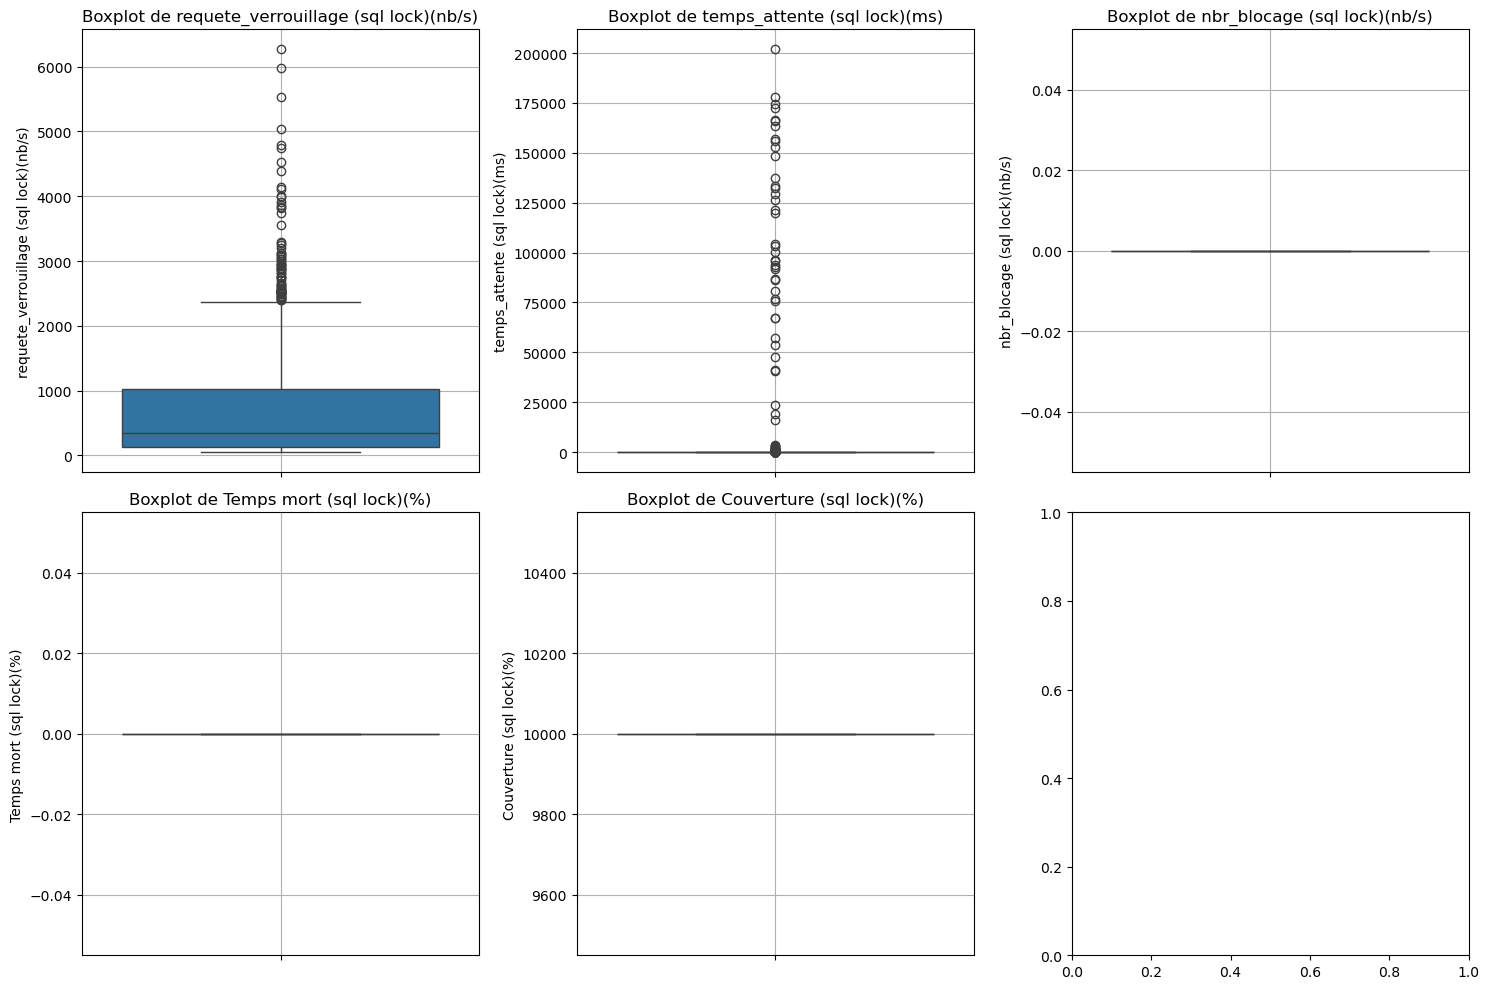

In [71]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [73]:
tab = tab.drop(columns=["Couverture (sql lock)(%)"])
tab = tab.drop(columns=["Temps mort (sql lock)(%)"])
tab = tab.drop(columns=["nbr_blocage (sql lock)(nb/s)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [75]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_sql_lock_filtered.csv", index=False, encoding='utf-8')